In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot

In [4]:
test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel < -11. and (x1 >= -4 and x1 < 2)",
                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11. and (x1 >= -4 and x1 < 2)"]


In [5]:
composites_test, sn_arrays_test, og_sn_arrays_test, boot_sn_arrays_test = kpora.make_composite(test_queries, shape_param='x1', boot=True, medmean=1, verbose=True, gini_balance=True, combine=True, get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel < -11. and (x1 >= -4 and x1 < 2)
53 Total Spectra found
2 flagged spectra removed 51 spectra left
0 spectra of peculiar Ias removed 51 spectra left
48 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
47 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2004ef_combined None foundation 60.78745158363738 0.22776669146777803 -1.45844471564 3378.0 7194.0
1996bo 1996bo-50390.27.dat foundation 15.7197657513 3.02588731211 -1.27685027241 3694.0 7384.0
ps16bnz ps16bnz_20160406_kosmos_Foundation.dat foundation 2.55180566637 -3.29536595464 -1.14804869867 3972.0 6592.0
1998dh 1998dh-51029.36.dat foundation 66.5628550997 -0.292082732869 -0.829205269587 3738.0 7420.0
2006os 2006os-54061.18.dat foundation 13.5615094953 -3.39074063703 -0.591909743529 3618.0 8612.0
ps15atx ps15atx_2015

Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


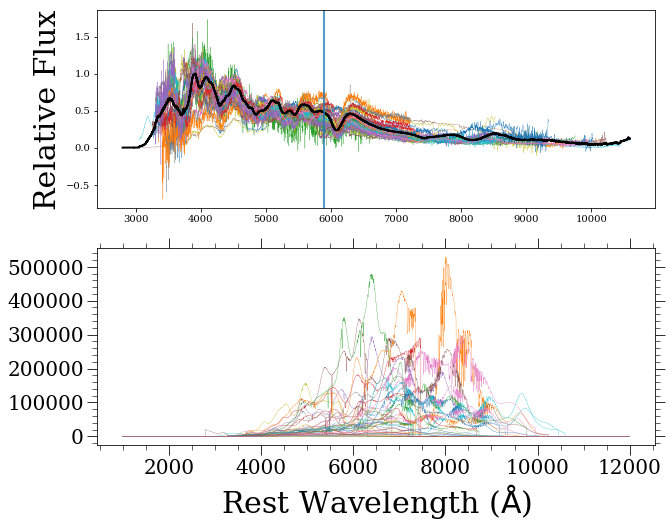

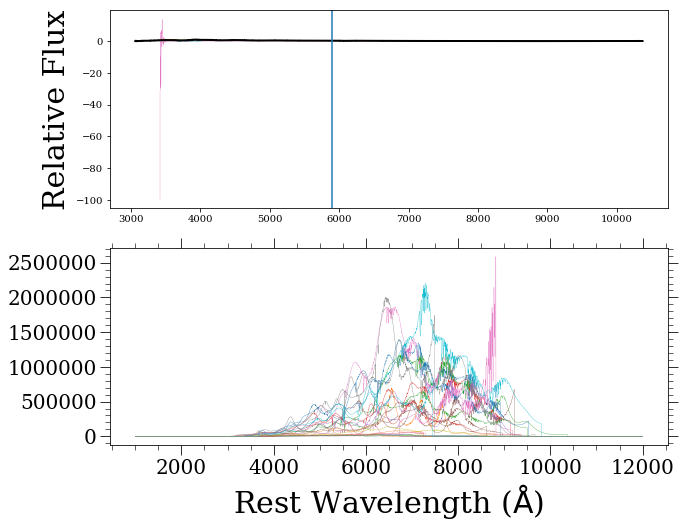

In [6]:
kplot.plot_comp_and_all_spectra(composites_test[0], sn_arrays_test[0], show_ivar=True)
kplot.plot_comp_and_all_spectra(composites_test[1], sn_arrays_test[1], show_ivar=True)

Phase:  -0.7932165657589342
dm15:  -0.9878481375617624
Redshift:  0.019870846280586097
HR:  29.54487728508793
Phase:  -0.10232570602264457
dm15:  -0.811598906704453
Redshift:  0.021943871468481913
HR:  0.19926857190732356


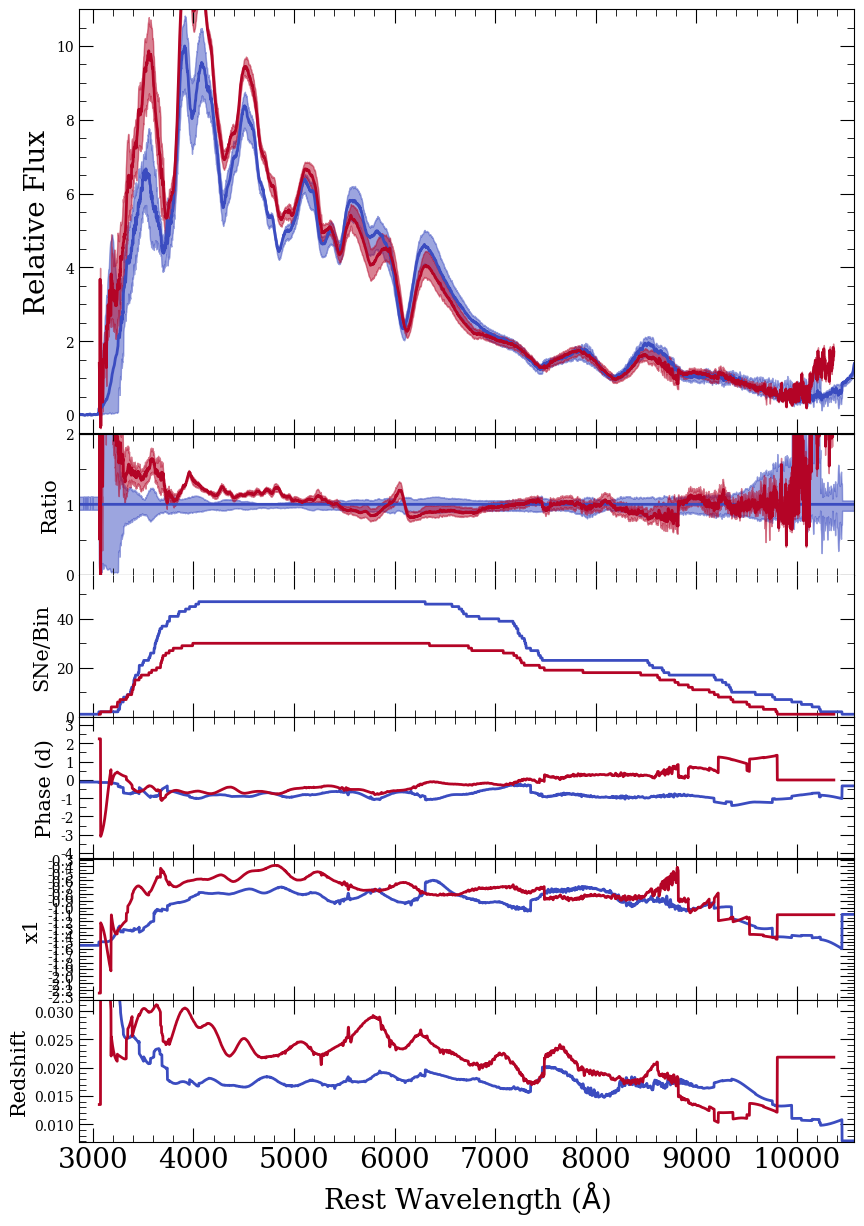

In [7]:
kpora.set_min_num_spec(composites_test, 5)
kplot.comparison_plot(composites_test, scale_type=False, min_num_show=1, extra=False, legend_labels = None,
                      savename = None)